In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from glob import glob

In [2]:
!unzip caltech-101.zip

Streaming output truncated to the last 5000 lines.
  inflating: caltech-101/Faces_easy/image_0241.jpg  
  inflating: caltech-101/Faces_easy/image_0242.jpg  
  inflating: caltech-101/Faces_easy/image_0243.jpg  
  inflating: caltech-101/Faces_easy/image_0244.jpg  
  inflating: caltech-101/Faces_easy/image_0245.jpg  
  inflating: caltech-101/Faces_easy/image_0246.jpg  
  inflating: caltech-101/Faces_easy/image_0247.jpg  
  inflating: caltech-101/Faces_easy/image_0248.jpg  
  inflating: caltech-101/Faces_easy/image_0249.jpg  
  inflating: caltech-101/Faces_easy/image_0250.jpg  
  inflating: caltech-101/Faces_easy/image_0251.jpg  
  inflating: caltech-101/Faces_easy/image_0252.jpg  
  inflating: caltech-101/Faces_easy/image_0253.jpg  
  inflating: caltech-101/Faces_easy/image_0254.jpg  
  inflating: caltech-101/Faces_easy/image_0255.jpg  
  inflating: caltech-101/Faces_easy/image_0256.jpg  
  inflating: caltech-101/Faces_easy/image_0257.jpg  
  inflating: caltech-101/Faces_easy/image_0258.j

In [5]:
image_files = glob('/content/caltech-101/*/*.jp*g')

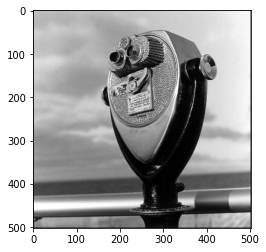

In [6]:
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [7]:
resnet = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=True)
resnet.summary()

102967424/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [8]:
activation_layer = resnet.get_layer('conv5_block3_out')

In [9]:
model=Model(inputs=resnet.input,outputs=activation_layer.output)

In [13]:
final_dense=resnet.get_layer('predictions')
W=final_dense.get_weights()[0]

1/1 [==============================] - 0s 203ms/step
[('n03868863', 'oxygen_mask', 0.45184135), ('n03424325', 'gasmask', 0.2512373), ('n03724870', 'mask', 0.09968392), ('n04251144', 'snorkel', 0.09199433), ('n10565667', 'scuba_diver', 0.032359082)]


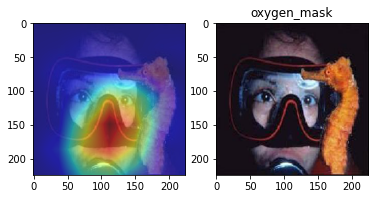

KeyboardInterrupt: ignored

In [21]:
while True:
  img = image.load_img(np.random.choice(image_files), target_size=(224, 224))
  x = preprocess_input(np.expand_dims(img, 0))
  fmaps = model.predict(x)[0]
  probs = resnet.predict(x)
  classnames = decode_predictions(probs)[0]
  classname = classnames[0][1]
  print(classnames)
  pred = np.argmax(probs[0])
  w = W[:, pred]
  cam = fmaps.dot(w)
  cam = sp.ndimage.zoom(cam, (32, 32), order=1)
  plt.subplot(1,2,1)
  plt.imshow(img, alpha=0.8)
  plt.imshow(cam, cmap='jet', alpha=0.5)
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.title(classname)
  plt.show()
  ans = input("Continue? (Y/n)")
  if ans and ans[0].lower() == 'n':
    break